<a href="https://colab.research.google.com/github/Divyam-Deep/Simple-K-Mean-Clustring/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [5]:
data = pd.read_csv('/content/3.01.+Country+clusters.csv')
data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


In [6]:
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [8]:
kmean = KMeans(3)
kmean.fit(x)

KMeans(n_clusters=3)

In [10]:
identified_cluster = kmean.fit_predict(x)
identified_cluster

array([1, 1, 0, 0, 0, 2], dtype=int32)

In [11]:
clusters_data = pd.DataFrame(data)
clusters_data['cluster'] = identified_cluster
clusters_data

,Country,Latitude,Longitude,Language,cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


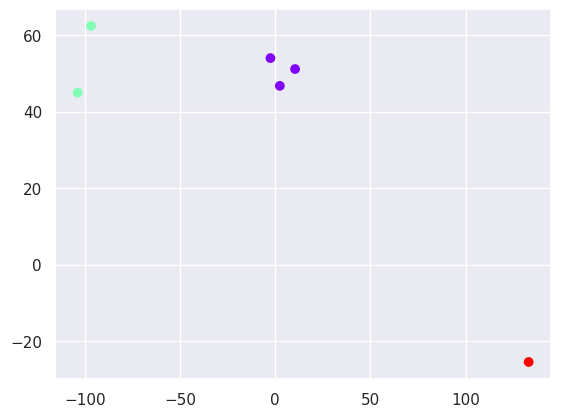

In [13]:
plt.scatter(clusters_data['Longitude'],clusters_data['Latitude'],c=clusters_data['cluster'],cmap='rainbow')
plt.show()

In [14]:
#WCSS (within cluster sum of square)
#its used to select the number of cluster (elbow method)

kmean.inertia_

288.10523333333333

In [16]:
#for each number of clusters(1,2,3,4,5,6)(nmber of idivisual clusters) we will find the wcss value
wcss = []
for i in range(1,7):
  kmean = KMeans(i)
  kmean.fit(x)
  wcss.append(kmean.inertia_)

In [17]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 214.69914999999995,
 41.67999999999999,
 0.0]

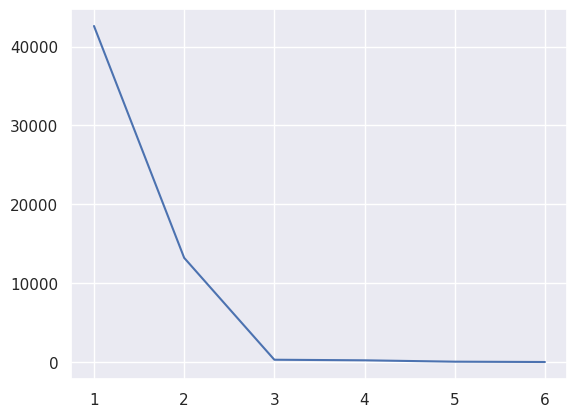

In [18]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.show()

In [ ]:
#we see 3 is the optimal number of clusters